## What is ETL

ETL are the three different processes needed to pull databases from one database and place it in another database.

### E - Extract
Process of reading data from a database. In this stage, the data is collected, often from multiple and different types of sources.

In our case, we will be extracting data from our own computers. For simplicity sakes, one of our folders on our computers will be the "database" and we will traverse through all the files in this folder and find our files we need to transform. 

### T - Transform
Process of converting the extracted data from its previous form into the form it needs to be in so that it can be placed into another database. Transformation occurs by using rules or lookup tables or by combining the data with other data.

In terms of transforming the data, we will load the data into python and convert it into a string in python and append a highlight section to the file

### L - Load
Process of writing the data into the target database

This is the part where we write the file into a .txt file in a different directory (database 2).

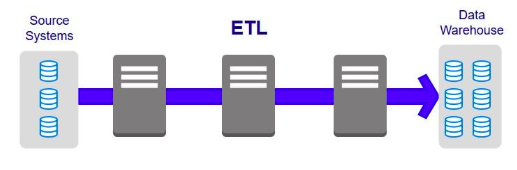

## How are we using ETL

We are going to be using ETL to transform the raw data from the archives database into a normalized format so that it can be used to train a model for machine learning. 

Essentially, we are transforming a bunch of types of files (pdf, excel, word) files into a more simpler '.txt' form. 

### Metadata

Once the files are collected into it's '.txt' form a 'highlight' section is appended to the end of the file. This highlight section is meant to summarize the data to train the machine learning model

### Why do we need to summarize the data for all these files?

The purpose of summarizing all these files is to be able to create "examples" for the machine learning model to understand how you summarize your data. So basically if you give it a new block of text without a summary, it will know how to summarize the new text based on the old examples you gave it.

## Installing packages

Below is code needed to perform ETL on the data. We will be using a python package called `textract`. Essentially this converts your files whether it be (pdf, word doc, excel) into strings in python. 

`textract` will be used in the transformation step<br>
`xlrd` will be used to interact with the excel files and is installed with textract

In [2]:
import sys

!{sys.executable} -m pip install textract

  Using cached https://files.pythonhosted.org/packages/0c/b0/8946fe3f9c2690c164aaa88dfd43b56347d3cdeac34124b988acd1aaa151/xlrd-1.0.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/af/a3/9e803f838b3eeb313d45d916d4387cda8572c92e1aafeb53fd43ddb5da2c/beautifulsoup4-4.5.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ce/c7/ab6cd0d00ddf8dc3b537cfb922f3f049f8018f38c88d71fd164f3acb8416/SpeechRecognition-3.6.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f0/0f/f965f1520e6ba24b63320919eecfbe3d03debd32402e0c61a08e8fa02d17/argcomplete-1.8.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7e/5c/605ca2daa5cf21c87690d8fe6ab05a6f2278c451f4ede6456dd26453f4bd/chardet-2.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c8/0a/b6723e1bc4c516cb687841499455a8505b44607ab535be01091c0f24f079/six-1.10.0-py2.py3-none-any.whl
spyder 3.3.2 requires pyqt5<5.10; python_version >=

## Extracting Data

Essentially extracting the file paths so you know where to look to transform the data

Create a list of file paths and metadata paths so you know where the files you want to look for:
 1. traverse through all the files in the desired directory<br>
 (https://stackoverflow.com/questions/19587118/iterating-through-directories-with-python)
 2. check if the file is a proper file you want to convert by looking at the extension:<br>
 `if file_extension.lower() in accepted_file_ext:`
 3. check if the file is a metadata:<br>
 `if 'metadata' in curr_dir and file_extension.lower() in ['.xlsx', '.xls']:`
     

In [3]:
from os import listdir, walk
from os.path import join, splitext, basename

# path to the directory you want to extract (path to database)
mypath = '/Users/matt/Documents/OPS_Hackathon/RG 67-5'

# an empty list of the file paths of the files u want to transform
file_paths = []

# an empty list of the metadata paths
md_paths = []

# accepted file extensions from the files you are reading
accepted_file_ext =  ['.csv', '.doc', '.docx', '.eml', '.epub', '.gif', '.jpg', '.json', '.html', '.htm', '.mp3',
                    '.msg', '.odt', '.ogg', '.pdf', '.png', '.pptx', '.ps', '.rtf', '.tiff', '.tif', '.txt',
                    '.wav', '.xlsx', '.xls']
# Extract
# creates a list of all file paths

# (1) traverse through all the files in the desired directory
for (dirpath, dirnames, filenames) in walk(mypath):
    curr_dir = dirpath.split('/')[-1].lower()
    
    for file in filenames:
        filename, file_extension = splitext(file)
        
        # (2) checks if file has the proper extension 
        if file_extension.lower() in accepted_file_ext:
            
            # (3) check if the file is a meta data
            # adds the path to the data to a list
            if 'metadata' in curr_dir and file_extension.lower() in ['.xlsx', '.xls']:
                md_paths.append(join(dirpath, file))
            else:
                file_paths.append(join(dirpath, file))
                
# prints the list of file paths (delete comment to see the list of paths)
# print(file_paths)
# print(md_paths)

['/Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_metadata/RG 67-5_filelist.PDF', '/Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Annual Reports/2004/AnnualReport04-05.pdf', '/Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Annual Reports/2009/Chair_s report 2008-2009 (2).docx', '/Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Annual Reports/2009/French/Exemption from translation form v09May.doc', '/Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Annual Reports/2009/French/French Language Annual Report.doc', '/Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Annual Reports/2009/French/Gap Analysis Template for Designation of New Areas-MOHLTC Jan25 2010.doc', '/Users

## Transforming and Loading

The two sections are grouped together because both are steps are closely linked together for this particular workflow. The `file_paths` and `md_paths` lists created earlier will be used to create a final .txt file with all the text and a description from the metadata.

Steps include:

1. Getting a list of descriptions from the metadata (example of excel file below)
    - loop through all the sheets within the excel file
    - find the column in first row that contains 'title' or 'description'
    - loops through all the items in that column and adds it to the description list
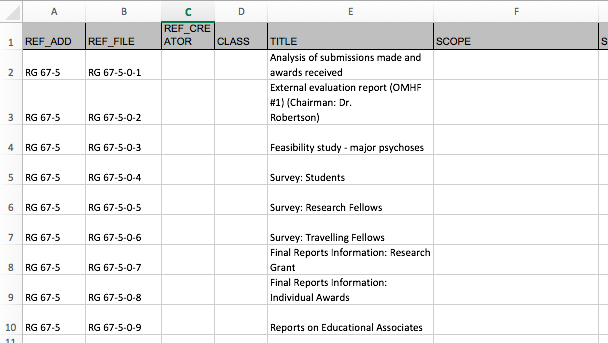
2. Convert files into text files (example output below)
    - create a filename for the file of the .txt
    - read file through `textract` into a string
    - check if file contains the highlight in metafile
    - create a .txt file in the `output_files` directory
    - write the text and highlight to the file
<br>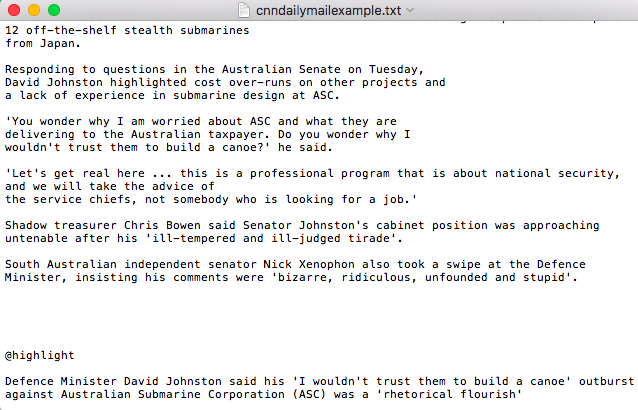

### NOTE: There may be many files unable to be read and that's normal, because some files  that come from the database are corrupt and cannot be opened.

In [5]:
## Transforming data
import textract
import xlrd

## (1) getting a list of descriptions from the metadata
description_list = []
for md_path in md_paths:
    try:
        xlrd_obj = xlrd.open_workbook(md_path)
        
        # loops through all the sheets
        for sheet in xlrd_obj.sheets():
            row_count = 0
            
            # finds column in excel file that contains title or description info
            for header in sheet.row(0):
                str_hdr =  header.value.lower()
                if 'title' in str_hdr or 'description' in str_hdr:
                    break                
                row_count += 1
                
            # loops through the items in the column
            for item in sheet.col(row_count):
                str_item = str(item.value)
                description_list.append(item.value)
    except:
        print("Failed to read file: %s" % md_path)

# clears the title or description (clears first item in list)
description_list.pop(0)


## (2) convert files into text files
for file_path in file_paths:
    
    # create a filename for the file of the .txt
    filename = basename(file_path) + ".txt"
    try:
        
        # read file through `textract` into a string
        text = textract.process(file_path)
        highlight = ''
        
        # check if file contains the highlight in metafile
        for descrip in description_list:
            if descrip in text:
                highlight = descrip
                print(highlight)
                break
        
        # create a .txt file in the `output_files` directory
        with open(join("output_files", filename), "w") as text_file:
            # write the text and highlight to the file
            text_file.write(text)
            text_file.write('\n\n\n@highlight\n\n%s' % highlight)
    except:
        print("Failed to read file: %s" % file_path)

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_metadata/RG 67-5 File list for ADD.xlsx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_metadata/~$RG 67-5 File list for ADD.xlsx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_metadata/RG 67-5_filelist.PDF
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Annual Reports/2004/AnnualReport04-05.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Annual Reports/2009/Chair_s report 2008-2009 (2).docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Annual Reports/2009/French/Exemption from translation form v09May.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 O

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Annual Reports/2013/OMHF 2014 FS.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Annual Reports/2013/OMHF 2014 FS_fre-CA-final.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Annual Reports/2013/ED Report/ED Draft1.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Annual Reports/2014/Annual report 2014-2015.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Annual Reports/2014/Chair Report 2014-2015.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 O

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Audit/2001-2017 Audited Financial Statements/Financial Statement March 31, 2016.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Audit/2001-2017 Audited Financial Statements/Financial Statements March 31, 2017.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Audit/2003-2017 Misc/2007-08 GRANTS Commitment.xls
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Audit/2003-2017 Misc/Accrued Sal and Benefits 04.xls
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Audit/2003-2017 Misc/Adm Exp variance 2004.xls
Failed to 

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Audit/2016-2017 Audit/Confirmation Letters/Receivable Confirmation - The Hospital for Sick Children.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Audit/2016-2017 Audit/Confirmation Letters/Receivable Confirmation - University of Ottawa.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Audit/2016-2017 Audit/Confirmation Letters/Receivable Confirmation - York University.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Audit/2016-2017 Audit/Draft statements/2017 OMHF Draft Financial Statements 06 14 17.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 in

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Business Plans/2009/AUG18 Final Bus Plan.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Business Plans/2009/Avison Edited.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Business Plans/2009/BUSINESS PLAN D1  V2 KJ to AG.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Business Plans/2009/BUSINESS PLAN D1  V3 KJ mods (3).doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Business Plans/2009/BUSINESS PLAN D1 0.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Business Plans/2012/2012-2014 BUS PLAN D1.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Business Plans/2012/2012-2014 BUS PLAN D1@2012-02-21T14_41_44.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Business Plans/2012/2012-2014 BUS PLAN D1@2012-02-21T17_10_42.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Business Plans/2012/2012-2016 BUSINESS PLAN (2).docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Business Plans/2012/2012-2016 BUSINESS PLAN.doc
Failed to read file: 

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Business Plans/2015/05192 OMHF 2015-16 Business Plan (10May16).doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Business Plans/2015/2013-2016 BUSINESS PLAN.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Business Plans/2015/APRIL 2015 DRAFT BUSINESS PLAN.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Business Plans/2015/BUSINESS PLAN 2015-2016.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Business Plans/2015/Grants and Fellowships MOHLTC _ OMHF.xls
Failed to read file: 

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Governance/Board Renewal/Chair job.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Governance/Board Renewal/Draft Board Prospect Letter.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Governance/Board Renewal/gill brown reappoint matthews.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Governance/Board Renewal/Gill reappoint 2013.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Governance/Board Renewal/Letter to David Caplan re Macmillan.doc
Failed to read file: /Users/ma

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2011/12 2011/AGENDA/Agenda 2011-12-01.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2011/12 2011/DOCUMENTS/Board and Committees Summary.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2012/03 2012/GRANT AND FELLOWSHIP FUNDS.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2012/03 2012/GRANT AND FELLOWSHIP FUNDS@2012-02-24T18_24_51.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2012/03 2012/GRANT SUCCESS RATES.docx
Failed t

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2014/03 2014/Minutes (2014-03-06) (2015_01_27 18_58_40 UTC).pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2014/06 2014/AGENDA JUNE 25 2014 hm.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2014/06 2014/Minutes June 2014 meeting.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2014/06 2014/web front page blurb.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2014/09 2014/Agenda September 2014.docx
Failed to read file: /Users

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2015/03 2015/Grants report FY2015-2016-not recommended.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2015/03 2015/Grants report FY2015-2016-ongoing.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2015/03 2015/Grants report FY2015-2016-recommended.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2015/03 2015/Grants report FY2015-2016.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2015/03 2015/Grants report FY2015-2016.xls
Fail

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2016/03 2016/Fellowships report March 2016 not recommended.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2016/03 2016/Fellowships report March 2016 ongoing.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2016/03 2016/Fellowships report March 2016 ongoing.xlsx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2016/03 2016/Fellowships report March 2016 recommended.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2016/03 2016/Fellowshi

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2016/12 2016/05. OMHF Call for Proposal Strategy 2017.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2016/12 2016/Minutes Dec 7 2016 Board Meeting.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2016/12 2016/OMHF Dec 7 2016 Board meeting Agenda.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2016/12 2016/~$HF Dec 7 2016 Board meeting Agenda.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2017/01 2017/3. Minutes Dec 7 2016 

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2017/09 2017/Outgoing Board Meeting/4. Financial Statements March 31, 2017.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2017/09 2017/Outgoing Board Meeting/6. Appendix A.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2017/09 2017/Outgoing Board Meeting/OMHF Outgoing Minutes Sept 6 2017 Board Meeting.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Meetings/2017/09 2017/Outgoing Board Meeting/OMHF Sept 6 2017 Outgoing Board Meeting Agenda.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/0

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Members/Barry MacDougall/MacDougall reappointment form December 2015.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Members/Barry MacDougall/MacDougall reappointment letter December 2015.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Members/Board Member Info/943375 funding letter.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Members/Board Member Info/Board Members 2016-2017 Sept 2016.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Members/Board Member Info/Board Memb

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Members/Herman Gill/Herman Gill - Congratulations June 2017.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Members/Herman Gill/Herman Gill - desig. OIC VC OMHF (Dec 2015).pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Members/Herman Gill/Herman Gill - OMHF congrats ltr January 6 2016.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Members/Herman Gill/Herman Gill reappointment form April 2017.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Board Members/Herman Gill/Herman Gill

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Core Documents/CRA Business Registration/Confirmation of registration 2015.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Core Documents/Investment Policy/Invest Policy.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Core Documents/OMHF Act/Ontario Mental Health Foundation Act.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Core Documents/OMHF Act/Ontario Mental Health Foundation Act.pdf
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Core Documents/OMHF History/History of the Ontario Mental Health Foun

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Productivity Reports/2007/Publications 2006-2007.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Productivity Reports/2012/2012 Health Research Productivity Analysis FINAL.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Productivity Reports/2012/app and awards by yuear.xlsx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Productivity Reports/2012/big seven dollar chart.xlsx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Productivity Reports/2012/Chart App v. Recommended.docx
Failed to read file: /Users/matt

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Productivity Reports/2016/Ontario Mental Health Foundation Productivity 2015-2016  Radhu.doc
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Productivity Reports/2016/Ontario Mental Health Foundation Productivity 2015-2016 - Rizvi.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Productivity Reports/2016/Ontario Mental Health Foundation Productivity 2015-2016 Abizaid.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Productivity Reports/2016/Ontario Mental Health Foundation Productivity 2015-2016 Ameis.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 in

Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Productivity Reports/2016/Ontario Mental Health Foundation Productivity 2015-2016_Marin.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Productivity Reports/2016/Ontario Mental Health Foundation Productivity 2015-2016_Vigod.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Productivity Reports/2016/Ontario Mental Health Foundation productivity report Choleris .msg
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_records/2017 intake/004-01 OMHF - Governance Files [RG 67-5]/Productivity Reports/2016/Ontario Mental Health Foundation Productivity_2015-2016_30May2016 Voineskos.docx
Failed to read file: /Users/matt/Documents/OPS_Hackathon/RG 67-5/RG 67-5_recor

## Conclusion

Now, look at your output_files folder and check if the text files are there. Congrats! you finished the ETL component of your hackathon